## Accessing Dashboards

In [1]:
import os
os.getcwd()

os.chdir("influenza_dashboard")

FileNotFoundError: [Errno 2] No such file or directory: 'influenza_dashboard'

In [2]:
!wget https://api.ukhsa-dashboard.data.gov.uk/themes/infectious_disease/sub_themes/respiratory/topics/Influenza/geography_types/Nation/geographies/England/metrics/influenza_healthcare_hospitalAdmissionRateByWeek

--2024-10-25 13:17:57--  https://api.ukhsa-dashboard.data.gov.uk/themes/infectious_disease/sub_themes/respiratory/topics/Influenza/geography_types/Nation/geographies/England/metrics/influenza_healthcare_hospitalAdmissionRateByWeek
Resolving api.ukhsa-dashboard.data.gov.uk (api.ukhsa-dashboard.data.gov.uk)... 108.138.217.42, 108.138.217.58, 108.138.217.88, ...
Connecting to api.ukhsa-dashboard.data.gov.uk (api.ukhsa-dashboard.data.gov.uk)|108.138.217.42|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2234 (2.2K) [application/json]
Saving to: ‘influenza_healthcare_hospitalAdmissionRateByWeek.2’

influenza_healthcar 100%[===================>]   2.18K  --.-KB/s    in 0s      

2024-10-25 13:17:57 (197 MB/s) - ‘influenza_healthcare_hospitalAdmissionRateByWeek.2’ saved [2234/2234]



In [3]:
!cat influenza_healthcare_hospitalAdmissionRateByWeek

{"count":2238,"next":"https://api.ukhsa-dashboard.data.gov.uk/themes/infectious_disease/sub_themes/respiratory/topics/Influenza/geography_types/Nation/geographies/England/metrics/influenza_healthcare_hospitalAdmissionRateByWeek?page=2","previous":null,"results":[{"theme":"infectious_disease","sub_theme":"respiratory","topic":"Influenza","geography_type":"Nation","geography":"England","geography_code":"E92000001","metric":"influenza_healthcare_hospitalAdmissionRateByWeek","metric_group":"healthcare","stratum":"default","sex":"all","age":"all","year":2015,"month":6,"epiweek":27,"date":"2015-06-29","metric_value":0.0,"in_reporting_delay_period":false},{"theme":"infectious_disease","sub_theme":"respiratory","topic":"Influenza","geography_type":"Nation","geography":"England","geography_code":"E92000001","metric":"influenza_healthcare_hospitalAdmissionRateByWeek","metric_group":"healthcare","stratum":"default","sex":"all","age":"all","year":2015,"month":7,"epiweek":28,"date":"2015-07-06","me

## Using the "requests" library

In [4]:
import requests

requests.get("https://api.ukhsa-dashboard.data.gov.uk/themes"
            "/infectious_disease/sub_themes/respiratory/topics"
            "/Influenza/geography_types/Nation/geographies/England"
            "/metrics/influenza_healthcare_hospitalAdmissionRateByWeek", 
             params={'year': 2015, 'page_size': 3, 'page': 2}).json()

{'count': 26,
 'next': 'https://api.ukhsa-dashboard.data.gov.uk/themes/infectious_disease/sub_themes/respiratory/topics/Influenza/geography_types/Nation/geographies/England/metrics/influenza_healthcare_hospitalAdmissionRateByWeek?page=3&page_size=3&year=2015',
 'previous': 'https://api.ukhsa-dashboard.data.gov.uk/themes/infectious_disease/sub_themes/respiratory/topics/Influenza/geography_types/Nation/geographies/England/metrics/influenza_healthcare_hospitalAdmissionRateByWeek?page_size=3&year=2015',
 'results': [{'theme': 'infectious_disease',
   'sub_theme': 'respiratory',
   'topic': 'Influenza',
   'geography_type': 'Nation',
   'geography': 'England',
   'geography_code': 'E92000001',
   'metric': 'influenza_healthcare_hospitalAdmissionRateByWeek',
   'metric_group': 'healthcare',
   'stratum': 'default',
   'sex': 'all',
   'age': 'all',
   'year': 2015,
   'month': 7,
   'epiweek': 30,
   'date': '2015-07-20',
   'metric_value': 0.0,
   'in_reporting_delay_period': False},
  {'th

## Simple API wrapper object

In [5]:
import requests
import time

class APIwrapper:
    _access_point="https://api.ukhsa-dashboard.data.gov.uk"
    _last_access=0.0 
    
    def __init__(self, theme, sub_theme, topic, geography_type, geography, metric):
        """ Init the APIwrapper object, constructing the endpoint from the structure
        parameters """
     
        url_path=(f"/themes/{theme}/sub_themes/{sub_theme}/topics/{topic}/geography_types/" +
                  f"{geography_type}/geographies/{geography}/metrics/{metric}")
    
        self._start_url=APIwrapper._access_point+url_path
        self._filters=None
        self._page_size=-1

        self.count=None

    def get_page(self, filters={}, page_size=5):
        """ Access the API and download the next page of data. Sets the count
        attribute to the total number of items available for this query. Changing
        filters or page_size will cause get_page to restart from page 1. Rate
        limited to three request per second. The page_size parameter sets the number
        of data points in one response page (maximum 365); use the default value 
        for debugging your structure and filters, increase when you start looping 
        over all pages. """

        if page_size>365:
            raise ValueError("Max supported page size is 365")
   
        if filters!=self._filters or page_size!=self._page_size:
            self._filters=filters
            self._page_size=page_size
            self._next_url=self._start_url
 
        if self._next_url==None: 
            return [] 
       
        curr_time=time.time() 
        deltat=curr_time-APIwrapper._last_access
        if deltat<0.33: 
            time.sleep(0.33-deltat)
        APIwrapper._last_access=curr_time
        
        parameters={x: y for x, y in filters.items() if y!=None}
        parameters['page_size']=page_size
       
        response = requests.get(self._next_url, params=parameters).json()
        
        self._next_url=response['next']
        self.count=response['count']
  
        return response['results'] 

In [6]:
structure={"theme": "infectious_disease", 
           "sub_theme": "respiratory",
           "topic": "Influenza",
           "geography_type": "Nation", 
           "geography": "England"}

In [7]:
structure["metric"]="influenza_healthcare_hospitalAdmissionRateByWeek" 

In [8]:
api=APIwrapper(**structure)
data=api.get_page()
print(api.count)
print(data)

2238
[{'theme': 'infectious_disease', 'sub_theme': 'respiratory', 'topic': 'Influenza', 'geography_type': 'Nation', 'geography': 'England', 'geography_code': 'E92000001', 'metric': 'influenza_healthcare_hospitalAdmissionRateByWeek', 'metric_group': 'healthcare', 'stratum': 'default', 'sex': 'all', 'age': 'all', 'year': 2015, 'month': 6, 'epiweek': 27, 'date': '2015-06-29', 'metric_value': 0.0, 'in_reporting_delay_period': False}, {'theme': 'infectious_disease', 'sub_theme': 'respiratory', 'topic': 'Influenza', 'geography_type': 'Nation', 'geography': 'England', 'geography_code': 'E92000001', 'metric': 'influenza_healthcare_hospitalAdmissionRateByWeek', 'metric_group': 'healthcare', 'stratum': 'default', 'sex': 'all', 'age': 'all', 'year': 2015, 'month': 7, 'epiweek': 28, 'date': '2015-07-06', 'metric_value': 0.0, 'in_reporting_delay_period': False}, {'theme': 'infectious_disease', 'sub_theme': 'respiratory', 'topic': 'Influenza', 'geography_type': 'Nation', 'geography': 'England', 'geo

In [9]:
filters={"stratum" : None, 
         "age": None,         
         "sex": None, 
         "year": 2015,
         "month": None, 
         "epiweek" :None, 
         "date" : None,
         "in_reporting_delay_period": None
        }

In [10]:
data_2015=api.get_page(filters, page_size=3)
print(api.count)
print(data_2015)

26
[{'theme': 'infectious_disease', 'sub_theme': 'respiratory', 'topic': 'Influenza', 'geography_type': 'Nation', 'geography': 'England', 'geography_code': 'E92000001', 'metric': 'influenza_healthcare_hospitalAdmissionRateByWeek', 'metric_group': 'healthcare', 'stratum': 'default', 'sex': 'all', 'age': 'all', 'year': 2015, 'month': 6, 'epiweek': 27, 'date': '2015-06-29', 'metric_value': 0.0, 'in_reporting_delay_period': False}, {'theme': 'infectious_disease', 'sub_theme': 'respiratory', 'topic': 'Influenza', 'geography_type': 'Nation', 'geography': 'England', 'geography_code': 'E92000001', 'metric': 'influenza_healthcare_hospitalAdmissionRateByWeek', 'metric_group': 'healthcare', 'stratum': 'default', 'sex': 'all', 'age': 'all', 'year': 2015, 'month': 7, 'epiweek': 28, 'date': '2015-07-06', 'metric_value': 0.0, 'in_reporting_delay_period': False}, {'theme': 'infectious_disease', 'sub_theme': 'respiratory', 'topic': 'Influenza', 'geography_type': 'Nation', 'geography': 'England', 'geogr

## Downloading all data for cases

In [11]:
structure={"theme": "infectious_disease", 
           "sub_theme": "respiratory",
           "topic": "Influenza",
           "geography_type": "Nation", 
           "geography": "England"}

In [12]:
structure["metric"]="influenza_healthcare_hospitalAdmissionRateByWeek"
api=APIwrapper(**structure)
admissions=[]
page=1
while True:
    data=api.get_page(page_size=365)
    print(f"Pages retrieved: {page}")
    if data==[]:
        break
    admissions.extend(data)
    page+=1
print(f"Data points expected: {api.count}")
print(f"Data points retrieved: {len(admissions)}")

Pages retrieved: 1
Pages retrieved: 2
Pages retrieved: 3
Pages retrieved: 4
Pages retrieved: 5
Pages retrieved: 6
Pages retrieved: 7
Pages retrieved: 8
Data points expected: 2238
Data points retrieved: 2238


In [17]:
structure["metric"]="influenza_healthcare_hospitalAdmissionRateByWeek"

api=APIwrapper(**structure)
admissions=[]
while True:
    data=api.get_page(page_size=365)
    if data==[]:
        break
    admissions.extend(data)

In [18]:
structure["metric"]="influenza_healthcare_ICUHDUadmissionRateByWeek"
api=APIwrapper(**structure)
icuhdu=[]
while True:
    data=api.get_page(page_size=365)
    if data==[]:
        break
    icuhdu.extend(data)

In [19]:
structure["metric"]="influenza_testing_positivityByWeek"
api=APIwrapper(**structure)
positive=[]
while True:
    data=api.get_page(page_size=365)
    if data==[]:
        break
    positive.extend(data)

## JSON Format

In [21]:
import json

In [22]:
with open("admissions.json", "wt") as OUTF:
    json.dump(admissions, OUTF)

In [23]:
with open("icuhdu.json", "wt") as OUTF:
    json.dump(icuhdu, OUTF)

In [24]:
with open("positive.json", "wt") as OUTF:
    json.dump(positive, OUTF)

## Visualising the data

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import json

In [39]:
%matplotlib inline

plt.rcParams['figure.dpi'] = 100

## Time Series Data

In [40]:
with open("admissions.json", "rt") as INFILE:
    admissions=json.load(INFILE)
with open("icuhdu.json", "rt") as INFILE:
    cases=json.load(INFILE)
with open("positive.json", "rt") as INFILE:
    deaths=json.load(INFILE)

## Wrangling the data

In [41]:
cases[:5]

[{'theme': 'infectious_disease',
  'sub_theme': 'respiratory',
  'topic': 'Influenza',
  'geography_type': 'Nation',
  'geography': 'England',
  'geography_code': 'E92000001',
  'metric': 'influenza_healthcare_ICUHDUadmissionRateByWeek',
  'metric_group': 'healthcare',
  'stratum': 'default',
  'sex': 'all',
  'age': 'all',
  'year': 2015,
  'month': 6,
  'epiweek': 27,
  'date': '2015-06-29',
  'metric_value': 0.0,
  'in_reporting_delay_period': False},
 {'theme': 'infectious_disease',
  'sub_theme': 'respiratory',
  'topic': 'Influenza',
  'geography_type': 'Nation',
  'geography': 'England',
  'geography_code': 'E92000001',
  'metric': 'influenza_healthcare_ICUHDUadmissionRateByWeek',
  'metric_group': 'healthcare',
  'stratum': 'default',
  'sex': 'all',
  'age': 'all',
  'year': 2015,
  'month': 7,
  'epiweek': 28,
  'date': '2015-07-06',
  'metric_value': 0.0,
  'in_reporting_delay_period': False},
 {'theme': 'infectious_disease',
  'sub_theme': 'respiratory',
  'topic': 'Influen

In [42]:
data={}
for dataset in [admissions, icuhdu, positive]:
    for entry in dataset:
        date=entry['date']
        metric=entry['metric']
        value=entry['metric_value']
        if date not in data:
            data[date]={}
        data[date][metric]=value

In [43]:
data

{'2015-06-29': {'influenza_healthcare_hospitalAdmissionRateByWeek': 0.0,
  'influenza_healthcare_ICUHDUadmissionRateByWeek': 0.0},
 '2015-07-06': {'influenza_healthcare_hospitalAdmissionRateByWeek': 0.0,
  'influenza_healthcare_ICUHDUadmissionRateByWeek': 0.0},
 '2015-07-13': {'influenza_healthcare_hospitalAdmissionRateByWeek': 0.0,
  'influenza_healthcare_ICUHDUadmissionRateByWeek': 0.0},
 '2015-07-20': {'influenza_healthcare_hospitalAdmissionRateByWeek': 0.0,
  'influenza_healthcare_ICUHDUadmissionRateByWeek': 0.0},
 '2015-07-27': {'influenza_healthcare_hospitalAdmissionRateByWeek': 0.0,
  'influenza_healthcare_ICUHDUadmissionRateByWeek': 0.0},
 '2015-08-03': {'influenza_healthcare_hospitalAdmissionRateByWeek': 0.0,
  'influenza_healthcare_ICUHDUadmissionRateByWeek': 0.0},
 '2015-08-10': {'influenza_healthcare_hospitalAdmissionRateByWeek': 0.0,
  'influenza_healthcare_ICUHDUadmissionRateByWeek': 0.0},
 '2015-08-17': {'influenza_healthcare_hospitalAdmissionRateByWeek': 0.0,
  'influen

In [44]:
data['2015-07-06']

{'influenza_healthcare_hospitalAdmissionRateByWeek': 0.0,
 'influenza_healthcare_ICUHDUadmissionRateByWeek': 0.0}

In [45]:
dates=list(data.keys())
dates.sort()
dates

['2015-06-29',
 '2015-07-06',
 '2015-07-13',
 '2015-07-20',
 '2015-07-27',
 '2015-08-03',
 '2015-08-10',
 '2015-08-17',
 '2015-08-24',
 '2015-08-31',
 '2015-09-07',
 '2015-09-14',
 '2015-09-21',
 '2015-09-28',
 '2015-10-05',
 '2015-10-12',
 '2015-10-19',
 '2015-10-26',
 '2015-11-02',
 '2015-11-09',
 '2015-11-16',
 '2015-11-23',
 '2015-11-30',
 '2015-12-07',
 '2015-12-14',
 '2015-12-21',
 '2016-01-04',
 '2016-01-11',
 '2016-01-18',
 '2016-01-25',
 '2016-02-01',
 '2016-02-08',
 '2016-02-15',
 '2016-02-22',
 '2016-02-29',
 '2016-03-07',
 '2016-03-14',
 '2016-03-21',
 '2016-03-28',
 '2016-04-04',
 '2016-04-11',
 '2016-04-18',
 '2016-04-25',
 '2016-05-02',
 '2016-05-09',
 '2016-05-16',
 '2016-05-23',
 '2016-05-30',
 '2016-06-06',
 '2016-06-13',
 '2016-06-20',
 '2016-06-27',
 '2016-07-04',
 '2016-07-11',
 '2016-07-18',
 '2016-07-25',
 '2016-08-01',
 '2016-08-08',
 '2016-08-15',
 '2016-08-22',
 '2016-08-29',
 '2016-09-05',
 '2016-09-12',
 '2016-09-19',
 '2016-09-26',
 '2016-10-03',
 '2016-10-

In [46]:
def parse_date(datestring):
    """ Convert a date string into a pandas datetime object """
    return pd.to_datetime(datestring, format="%Y-%m-%d")

In [47]:
startdate=parse_date(dates[0])
enddate=parse_date(dates[-1])
print (startdate, ' to ', enddate)

2015-06-29 00:00:00  to  2024-10-14 00:00:00


In [48]:
index=pd.date_range(startdate, enddate, freq='W-MON')
timeseriesdf=pd.DataFrame(index=index, columns=['admissions', 'icuhdu', 'positive'])
timeseriesdf

,admissions,icuhdu,positive
2015-06-29,NaN,NaN,NaN
2015-07-06,NaN,NaN,NaN
2015-07-13,NaN,NaN,NaN
2015-07-20,NaN,NaN,NaN
2015-07-27,NaN,NaN,NaN
...,...,...,...
2024-09-16,NaN,NaN,NaN
2024-09-23,NaN,NaN,NaN
2024-09-30,NaN,NaN,NaN
2024-10-07,NaN,NaN,NaN


In [49]:
metrics ={'admissions': 'influenza_healthcare_hospitalAdmissionRateByWeek',
          'icuhdu': 'influenza_healthcare_ICUHDUadmissionRateByWeek',
          'positive': 'influenza_testing_positivityByWeek'}

for date, entry in data.items():
    pd_date=parse_date(date) 
    for column in ['admissions', 'icuhdu', 'positive']: 
        metric_name=metrics[column]
        value= entry.get(metric_name, 0.0)
        timeseriesdf.loc[date, column]=value
            
# fill in any remaining "holes" due to missing dates
timeseriesdf.fillna(0.0, inplace=True)
            
timeseriesdf

/tmp/ipykernel_171/2421734652.py:13: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  timeseriesdf.fillna(0.0, inplace=True)


,admissions,icuhdu,positive
2015-06-29,0.00,0.00,0.00
2015-07-06,0.00,0.00,0.00
2015-07-13,0.00,0.00,0.00
2015-07-20,0.00,0.00,0.00
2015-07-27,0.00,0.00,0.00
...,...,...,...
2024-09-16,0.00,0.00,1.55
2024-09-23,0.70,0.00,1.84
2024-09-30,1.76,0.00,1.27
2024-10-07,0.56,0.02,3.76


## Plotting

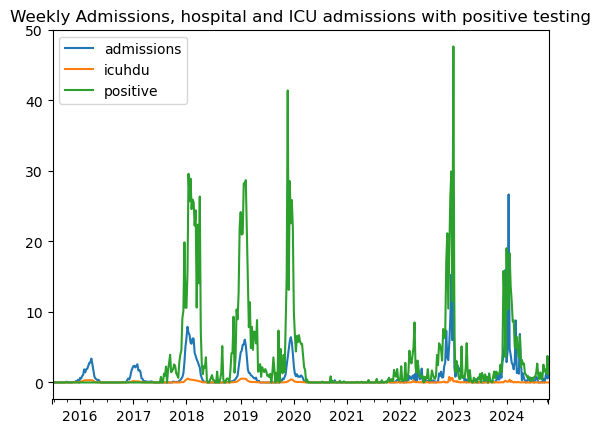

In [50]:
ax=timeseriesdf.plot() # easy peasy...
ax.set_title('Weekly Admissions, hospital and ICU admissions with positive testing');

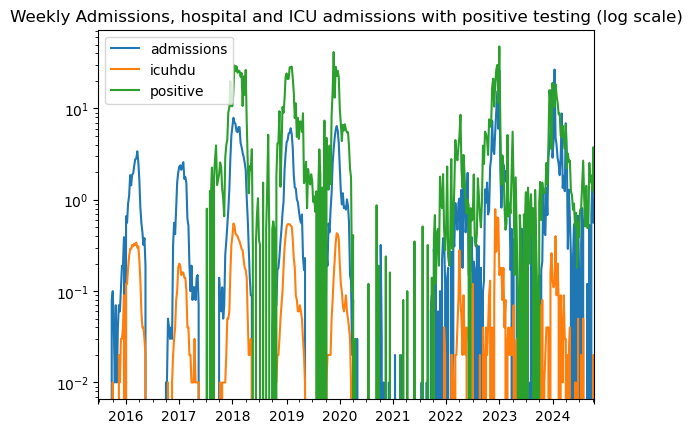

In [51]:
ax=timeseriesdf.plot(logy=True) 
ax.set_title('Weekly Admissions, hospital and ICU admissions with positive testing (log scale)');